In [1]:
setwd("C:/Users/Zoe/Desktop/Disertatie/Coduri")

In [3]:
library(forecast)
library(readxl)
library(tseries)
library(ggplot2)
library(urca)

In [4]:
Disertatie <- read_excel("Disertatie.xlsx")

In [5]:
train_data <- Disertatie[1:(nrow(Disertatie)-7), ]
test_data <- Disertatie[(nrow(Disertatie)-6):(nrow(Disertatie)-2), ]

In [6]:
RI <- Disertatie$RI
RI_test <- test_data$RI
RI_train <- train_data$RI
RI_all <- ts(RI, start=c(2005,2), end=c(2023, 2), frequency = 12)
RI_train <- ts(RI_train, start=c(2005,2), end=c(2022, 09), frequency = 12)
RI_test <- ts(RI_test, start=c(2022,10), end=c(2023, 02), frequency = 12)

In [7]:
ES <- ets(RI_train)
summary(ES)

ETS(A,Ad,N) 

Call:
 ets(y = RI_train) 

  Smoothing parameters:
    alpha = 0.9998 
    beta  = 0.2191 
    phi   = 0.8 

  Initial states:
    l = 8.7536 
    b = 0.402 

  sigma:  0.6783

     AIC     AICc      BIC 
977.9325 978.3423 998.0720 

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE     MASE
Training set 0.01681502 0.6702192 0.4364289 3.988056 21.97763 0.153683
                   ACF1
Training set 0.03362663

In [13]:
install.packages("knitr")

Warning message:
"package 'knitr' is in use and will not be installed"


In [25]:
# Install and load the knitr package
library("knitr")
library(kableExtra)

In [29]:
result <- data.frame(
  Parameter = c("Smoothing level", "Smoothing trend", "Damping parameter"),
  Estimate = c(8.7536, 0.402, 0.8),
  stringsAsFactors = FALSE
)

print(result)


          Parameter Estimate
1   Smoothing level   8.7536
2   Smoothing trend   0.4020
3 Damping parameter   0.8000


In [7]:
test <- forecast(ES, h = 5)
test

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2022       16.11393 15.24470 16.98316 14.78456 17.44331
Nov 2022       16.30113 14.95990 17.64235 14.24990 18.35236
Dec 2022       16.45088 14.68848 18.21328 13.75552 19.14624
Jan 2023       16.57069 14.41530 18.72607 13.27431 19.86706
Feb 2023       16.66653 14.13968 19.19338 12.80204 20.53102

In [8]:
forecast <- forecast(ES, h=12)
forecast

         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
Oct 2022       16.11393 15.24470 16.98316 14.784557 17.44331
Nov 2022       16.30113 14.95990 17.64235 14.249898 18.35236
Dec 2022       16.45088 14.68848 18.21328 13.755524 19.14624
Jan 2023       16.57069 14.41530 18.72607 13.274309 19.86706
Feb 2023       16.66653 14.13968 19.19338 12.802043 20.53102
Mar 2023       16.74321 13.86349 19.62292 12.339058 21.14735
Apr 2023       16.80454 13.58881 20.02028 11.886500 21.72259
May 2023       16.85362 13.31737 20.38987 11.445390 22.26184
Jun 2023       16.89287 13.05045 20.73529 11.016401 22.76935
Jul 2023       16.92428 12.78897 21.05959 10.599867 23.24869
Aug 2023       16.94941 12.53348 21.36533 10.195838 23.70297
Sep 2023       16.96951 12.28433 21.65468  9.804151 24.13486

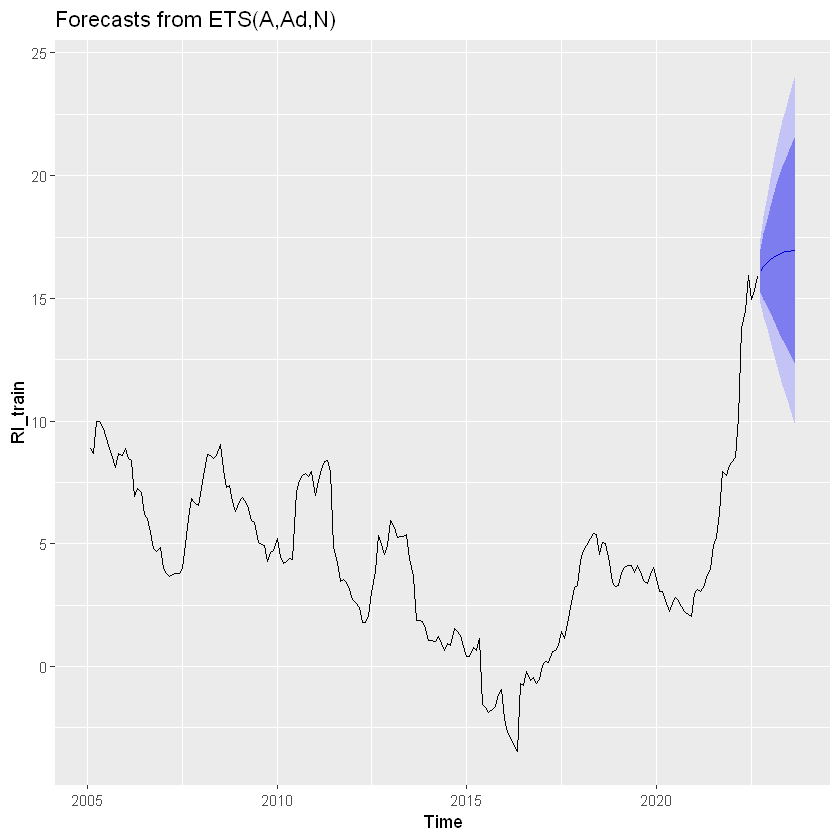

In [9]:
autoplot(forecast)


	Ljung-Box test

data:  Residuals from ETS(A,Ad,N)
Q* = 65.073, df = 19, p-value = 5.942e-07

Model df: 5.   Total lags used: 24



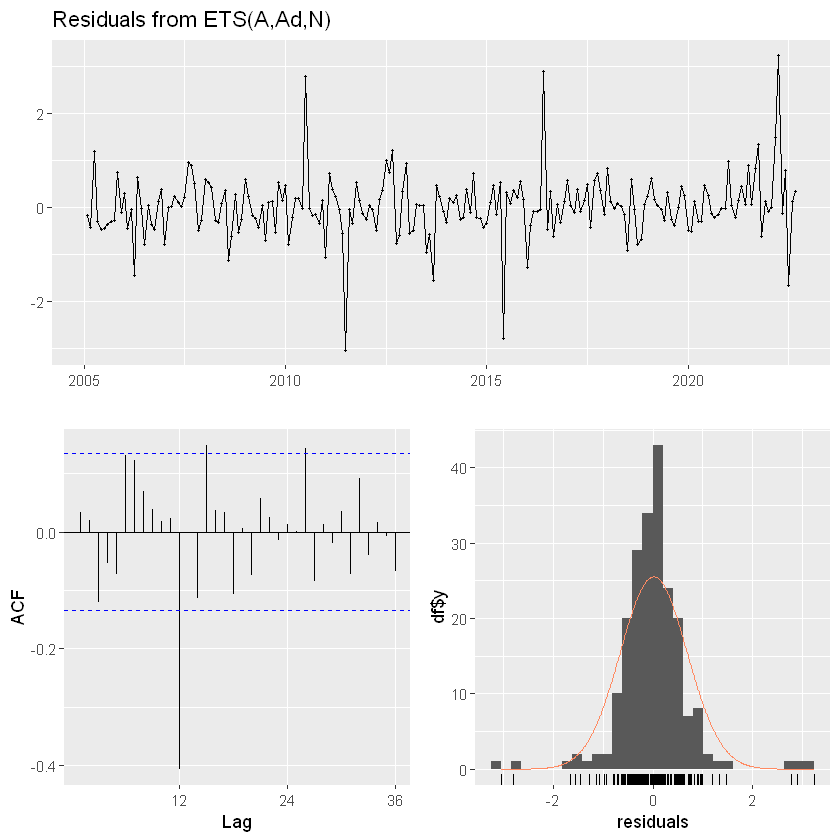

In [10]:
checkresiduals(ES)

In [11]:
residual_es = residuals(ES)
jarque.bera.test(residual_es)
white.test(residual_es)
Box.test(residual_es, lag = 4, type = "Ljung-Box")


	Jarque Bera Test

data:  residual_es
X-squared = 461.39, df = 2, p-value < 2.2e-16



	White Neural Network Test

data:  residual_es
X-squared = 1.1303, df = 2, p-value = 0.5683



	Box-Ljung test

data:  residual_es
X-squared = 4.1262, df = 4, p-value = 0.3892


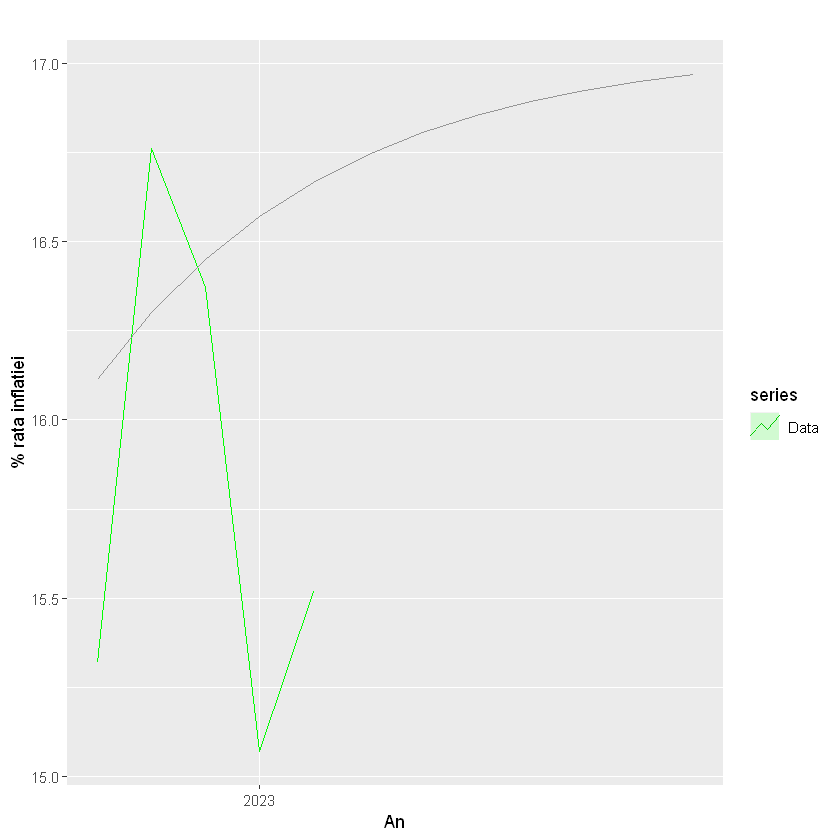

In [14]:
autoplot(RI_test, series="Data") +
  autolayer(ES %>% forecast(h=12), series="Predictie", PI=F) +
  xlab("An") + ylab("% rata inflatiei") +
  scale_colour_manual(values=c("green","blue"),
                      breaks=c("Data","ETS"))

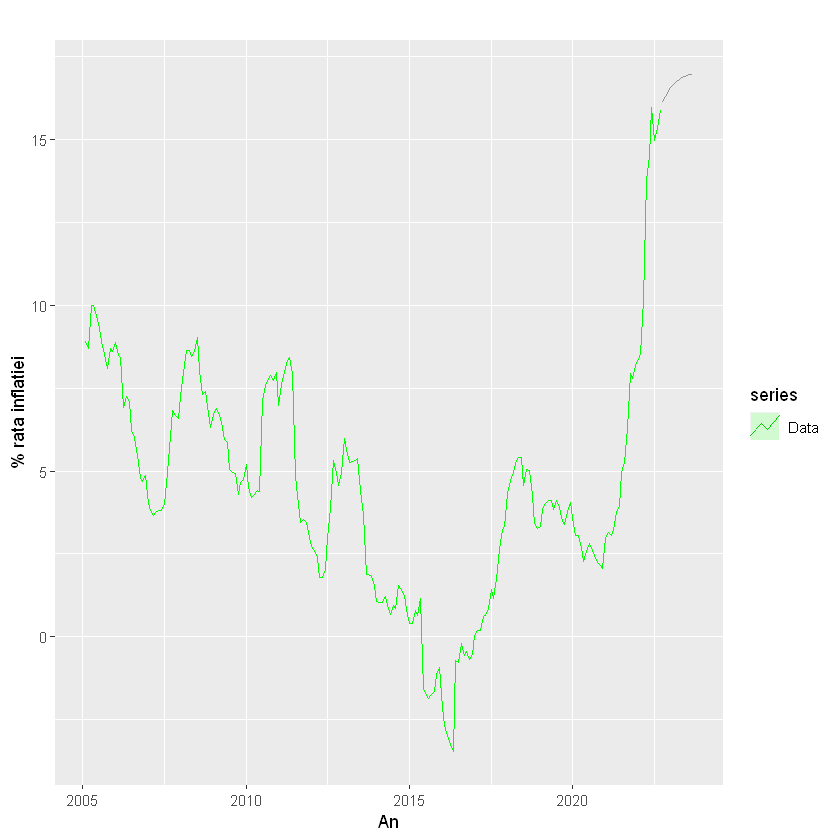

In [15]:
autoplot(RI_train, series="Data") +
  autolayer(ES %>% forecast(h=12), series="Predictie", PI=F) +
  xlab("An") + ylab("% rata inflatiei") +
  scale_colour_manual(values=c("green","blue"),
                      breaks=c("Data","ETS"))

In [12]:
# Calculați log-likelihood
log_likelihood <- logLik(ES)

# Calculați AIC și BIC
AIC_value <- AIC(ES)
BIC_value <- BIC(ES)

# Afișați rezultatele
print(log_likelihood)
print(AIC_value)
print(BIC_value)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

'log Lik.' -482.9663 (df=6)
[1] 977.9325
[1] 998.072


In [16]:
# Definiți data frame-ul cu previziunile
forecast_data <- data.frame(
  Point_Forecast = c(16.11393, 16.30113, 16.45088, 16.57069, 16.66653),
  Lo_80 = c(15.24470, 14.95990, 14.68848, 14.41530, 14.13968),
  Hi_80 = c(16.98316, 17.64235, 18.21328, 18.72607, 19.19338),
  Lo_95 = c(14.784557, 14.249898, 13.755524, 13.274309, 12.802043),
  Hi_95 = c(17.44331, 18.35236, 19.14624, 19.86706, 20.53102)
)

# Extrageți valorile din coloana "Point_Forecast"
forecast_values <- forecast_data$Point_Forecast

# Afișați valorile extrase
print(forecast_values)


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 16.11393 16.30113 16.45088 16.57069 16.66653


In [17]:
test_data$RI

[1] 15.32 16.76 16.37 15.07 15.52

In [18]:
errors = test_data$RI - forecast_values
errors

[1] -0.79393  0.45887 -0.08088 -1.50069 -1.14653

In [19]:
ME <- mean(errors)
ME

[1] -0.612632

In [20]:
RMSE <- sqrt(mean(errors^2))
RMSE

[1] 0.9395775

In [21]:
MAE <- mean(abs(errors))
MAE

[1] 0.79618

In [22]:
MPE <- mean(errors / test_data$RI) * 100
MPE

[1] -4.056812

In [23]:
MAPE <- mean(abs(errors / test_data$RI)) * 100
MAPE

[1] 5.151967

In [24]:
naive_error_mean <- 0.436
MASE <- mean(abs(errors)) / naive_error_mean
MASE

[1] 1.826101

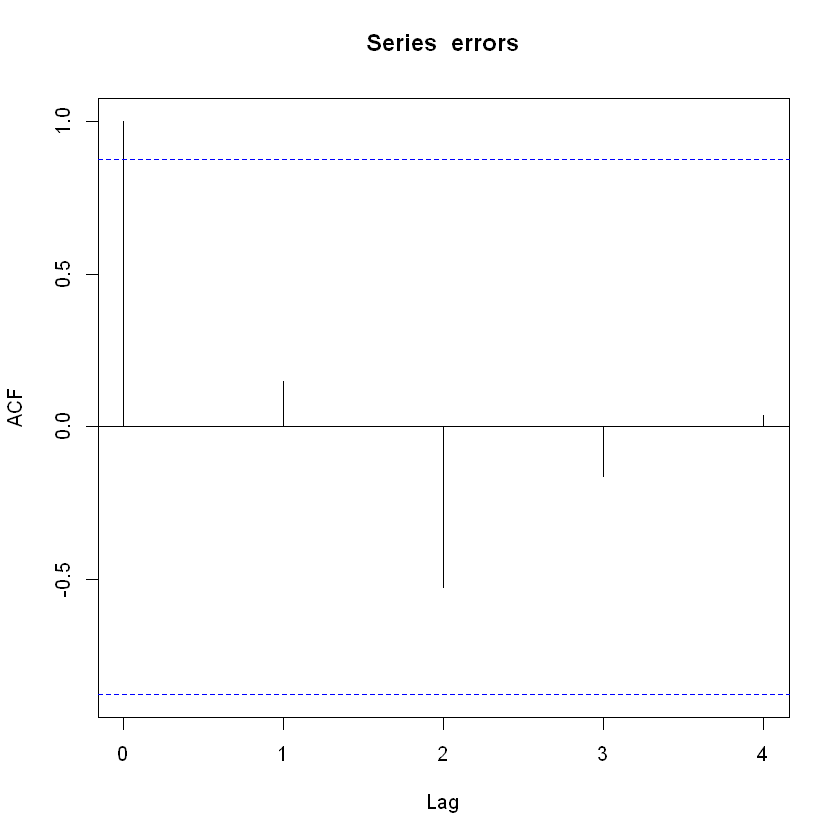

In [25]:
acf_values <- acf(errors)

In [26]:
acf_values$acf

, , 1

            [,1]
[1,]  1.00000000
[2,]  0.14873966
[3,] -0.52488451
[4,] -0.16200173
[5,]  0.03814658